# Student : Steven Melendez Lara
### Curso: XTOL - Module 5 - Task 4 - Capstone Project - Fraud Detection
### Date: March 2020 - Group: C-3 

In [1]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Link to this solution
# https://machinelearningmastery.com/how-to-fix-futurewarning-messages-in-scikit-learn/

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# 1 - Task Description

Hi,

Now that you have finished your analysis for Credit One, I would like to propose a different project for you. Employers like to see candidates for Data Science positions demonstrate that they can solve a complex problems on their own and in a relatively short amount of time. An ideal candidate might need to demonstrate the following knowledge and skills:

GitHub
Python and all libraries needed to solve the problem
Exploratory Data Analysis
Data collection, pre-processing and feature engineering
Data Visualization
Data science process: Best practices
Predictive Modeling and Evaluation (the whole process)
Model selection
Cross validation
For this task, you'll need to choose your own data and design a Data Science project that uncovers three or more relevant findings in the data that address goals you have defined beforehand.  

Your finished project should be accessible in the form of a link to your GitHub account. You will probably want to include work from earlier courses in your account so someone reviewing it won't just see one project and will be able to fully understand the potential I know you can bring to a Data Science role. 

Since this is a capstone project of your own choosing and design there is no plan of attack for this task.

Best of luck,

Your Mentor

## 1.1	Project Justification - Fraud Detection
A typical organization loses an estimated 5% of its yearly revenue to fraud.  The financial services industry and the industries that involve financial transactions are suffering from fraud-related losses and damages. 2016 was a banner year for financial scammers. In the US alone, the number of customers who experienced fraud hit a record 15.4 million people, which is 16 percent higher than 2015. 

Fraudsters stole about $6 billion from banks last year. A shift to the digital space opens new channels for financial services distribution. It also created a rich environment for fraudsters.

Customer loyalty and conversions are affected in both environments, the digital and the physical. According to Javelin Strategy & Research, it takes 40+ days to detect fraud for brick-and-mortar financial institutions. 

Fraud also impacts banks that provide online payments service. For instance, 20 percent of customers change their banks after experiencing scams.  So, the challenge for industry players is to implement real-time claim assessment and improve the accuracy of fraud detection.

The machine learning (ML) approach to fraud detection has received a lot of publicity in recent years and shifted industry interest from rule-based fraud detection systems to ML-based solutions. The main differences between these two methods are:

The rule-based approach: Fraudulent activities in finance can be detected by looking at on-surface and evident signals. Unusually, large transactions or the ones that happen in atypical locations obviously deserve additional verification. Purely rule-based systems entail using algorithms that perform several fraud detection scenarios, manually written by fraud analysts. 

Today, legacy systems apply about 300 different rules on average to approve a transaction. That’s why rule-based systems remain too straightforward. They require adding/adjusting scenarios manually and can hardly detect implicit correlations.

ML-based fraud detection: However, there are also subtle and hidden events in user behavior that may not be evident, but still signal possible fraud. Machine learning allows for creating algorithms that process large datasets with many variables and help find these hidden correlations between user behavior and the likelihood of fraudulent actions. Another strength of machine learning system compared to rule-based ones is faster data processing and less manual work.

Machine learning detection is divided in common (anomaly detection) and advanced detection systems. 

Anomaly detection: It’s one of the common anti-fraud approaches in data science. It is based on classifying all objects in the available data into two groups: normal distribution and outliers. Outliers, in this case, are the objects (e.g. transactions) that deviate from normal ones and are considered potentially fraudulent.

Advanced fraud detection: Advanced systems aren’t limited to finding anomalies but, in many cases, can recognize existing patterns that signal specific fraud scenarios. There are two types of machine learning approaches: unsupervised and supervised machine learning. They can be used independently or be combined to build more sophisticated anomaly detection algorithms.

Supervised learning entails training an algorithm using labeled historical data. In this case, existing datasets already have target variables marked, and the goal of training is to make the system predict these variables in future data.

Unsupervised learning models process unlabeled data and classify it into different clusters detecting hidden relations between variables in data items. 

Source: https://www.altexsoft.com/whitepapers/fraud-detection-how-machine-learning-systems-help-reveal-scams-in-fintech-healthcare-and-ecommerce/

## 1.2 Deliverables
### 1.2.1 General Requirements

### 1.2.2 Specific Requirements

### 1.2.3 Dataset Description

### Supervised Learning

### Unsupervised Learning

# 2 - Solution
### 2.1 - Load Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import random
%matplotlib inline
from matplotlib.patches import Rectangle
from pprint import pprint as pp
import csv
from pathlib import Path
import scipy
from math import sqrt
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import homogeneity_score, silhouette_score
from pickle import dump
from pickle import load
from itertools import product
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
from sklearn.cluster import MiniBatchKMeans, DBSCAN
from sklearn.cluster import KMeans
from sklearn import metrics

# 3 - Technique 1 - Fraud Detection with Supervised Learning

In [3]:
# Load the dataset
# https://assets.datacamp.com/production/repositories/2162/datasets/4fb6199be9b89626dcd6b36c235cbf60cf4c1631/chapter_2.zip
df = pd.read_csv(r'C:\Users\smele\Documents\XTOL Big Data\Module 5\Task 4 - Capstone Project\creditcard_sampledata_2.csv')

### 3.1 Exploratory Data Analysis

In [4]:
df.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,221547,-1.191668,0.428409,1.640028,-1.848859,-0.870903,-0.204849,-0.385675,0.352793,-1.098301,...,0.507173,1.292565,-0.467752,1.244887,0.697707,0.059375,-0.319964,-0.017444,27.44,0
1,184524,1.966614,-0.450087,-1.228586,0.142873,-0.150627,-0.543590,-0.076217,-0.108390,0.973310,...,0.124055,0.564916,-0.039331,-0.283904,0.186400,0.192932,-0.039155,-0.071314,35.95,0
2,91201,1.528452,-1.296191,-0.890677,-2.504028,0.803202,3.350793,-1.633016,0.815350,-1.884692,...,-0.412088,-1.017485,0.129566,0.948048,0.287826,-0.396592,0.042997,0.025853,28.40,0
3,26115,-0.774614,1.100916,0.679080,1.034016,0.168633,0.874582,0.209454,0.770550,-0.558106,...,0.011158,0.146017,-0.130401,-0.848815,0.005698,-0.183295,0.282940,0.123856,43.20,0
4,201292,-1.075860,1.361160,1.496972,2.242604,1.314751,0.272787,1.005246,0.132932,-1.558317,...,0.254485,0.530692,-0.651119,0.626389,1.040212,0.249501,-0.146745,0.029714,10.59,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7300 entries, 0 to 7299
Data columns (total 31 columns):
Unnamed: 0    7300 non-null int64
V1            7300 non-null float64
V2            7300 non-null float64
V3            7300 non-null float64
V4            7300 non-null float64
V5            7300 non-null float64
V6            7300 non-null float64
V7            7300 non-null float64
V8            7300 non-null float64
V9            7300 non-null float64
V10           7300 non-null float64
V11           7300 non-null float64
V12           7300 non-null float64
V13           7300 non-null float64
V14           7300 non-null float64
V15           7300 non-null float64
V16           7300 non-null float64
V17           7300 non-null float64
V18           7300 non-null float64
V19           7300 non-null float64
V20           7300 non-null float64
V21           7300 non-null float64
V22           7300 non-null float64
V23           7300 non-null float64
V24           7300 non-null flo

In [6]:
# Functions Definition
# Define a function to create a scatter plot of our data and labels
def prep_data(df: pd.DataFrame) -> (np.ndarray, np.ndarray):
    """
    Convert the DataFrame into two variable
    X: data columns (V1 - V28)
    y: lable column
    """
    X = df.iloc[:, 2:30].values
    y = df.Class.values
    return X, y

In [7]:
# Define a function to create a scatter plot of our data and labels
def plot_data(X: np.ndarray, y: np.ndarray):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

In [8]:
def prep_data(df: pd.DataFrame) -> (np.ndarray, np.ndarray):
    """
    Convert the DataFrame into two variable
    X: data columns (V1 - V28)
    y: lable column
    """
    X = df.iloc[:, 2:30].values
    y = df.Class.values
    return X, y

In [9]:
# Check for data imbalance
# Create X and y from the prep_data function 
X, y = prep_data(df)

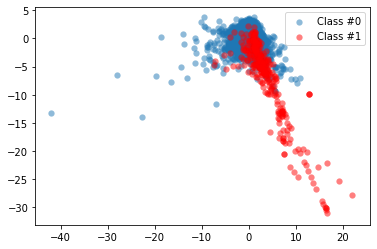

In [10]:
# Plot our data by running our plot data function on X and y
plot_data(X, y)

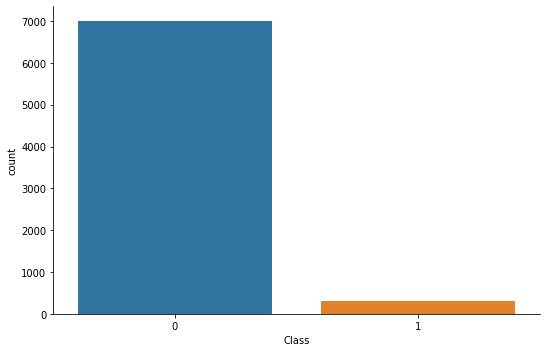

In [11]:
# Plot by class
sns.factorplot('Class', data=df, kind='count', aspect=1.5)

In [12]:
X, y = prep_data(df)
print(f'X shape: {X.shape}\ny shape: {y.shape}')

X shape: (7300, 28)
y shape: (7300,)


In [13]:
X[0, :]

array([ 4.28408570e-01,  1.64002800e+00, -1.84885886e+00, -8.70902974e-01,
       -2.04848888e-01, -3.85675453e-01,  3.52792552e-01, -1.09830131e+00,
       -3.34596757e-01, -6.79088729e-01, -3.96709268e-02,  1.37266082e+00,
       -7.32000706e-01, -3.44528134e-01,  1.02475103e+00,  3.80208554e-01,
       -1.08734881e+00,  3.64507163e-01,  5.19236276e-02,  5.07173439e-01,
        1.29256539e+00, -4.67752261e-01,  1.24488683e+00,  6.97706854e-01,
        5.93750372e-02, -3.19964326e-01, -1.74444289e-02,  2.74400000e+01])

In [14]:
# Count the total number of observations
total_obs = len(y)
total_obs

7300

In [15]:
# Count the total number of non-fraudulent observations 
non_fraud = [i for i in y if i == 0]
count_non_fraud = non_fraud.count(0)
count_non_fraud

7000

In [16]:
# Count the total number of fraudulent observations 
fraud = [i for i in y if i == 1]
count_fraud = fraud.count(1)
count_fraud

300

In [17]:
# Print the ratio of fraud cases
percentage = count_non_fraud/total_obs * 100
print(f'Non Fraud {percentage:0.2f}%')

percentage = count_fraud/total_obs * 100
print(f'Fraud {percentage:0.2f}%')

Non Fraud 95.89%
Fraud 4.11%


### 3.2 - Modeling

In [18]:
# Random Forest will be run without modifications (Out of the box)
# Split your data into training and test set (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
# Define the model as the random forest
modelRF = RandomForestClassifier(random_state=5, n_estimators=20)

In [20]:
# Fit the model to our training set
modelRF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [21]:
# Obtain predictions from the test data 
predicted = modelRF.predict(X_test)

In [22]:
print(f'Accuracy Score:\n{accuracy_score(y_test, predicted):0.3f}')

Accuracy Score:
0.991


In [23]:
# Predict probabilities
probs = modelRF.predict_proba(X_test)

In [24]:
# Obtain the predictions from random forest model 
predicted = modelRF.predict(X_test)

In [25]:
# Print the ROC curve, classification report and confusion matrix
print('ROC Score:')
print(roc_auc_score(y_test, probs[:,1]))
print('\nClassification Report:')
print(classification_report(y_test, predicted))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predicted))

ROC Score:
0.9419896444670147

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.97      0.80      0.88        91

    accuracy                           0.99      2190
   macro avg       0.98      0.90      0.94      2190
weighted avg       0.99      0.99      0.99      2190


Confusion Matrix:
[[2097    2]
 [  18   73]]


In [26]:
# Plotting the Precision vs. Recall Curve
# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)
average_precision

0.7890250388880526

In [27]:
# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test, predicted)
print(f'Precision: {precision}\nRecall: {recall}')

Precision: [0.04155251 0.97333333 1.        ]
Recall: [1.        0.8021978 0.       ]


In [28]:
### Plot PR Curve ###
def plot_pr_curve(recall, precision, average_precision):
    """
    https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
    """
    from inspect import signature
    plt.figure()
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})

    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])
    plt.title(f'2-class Precision-Recall curve: AP={average_precision:0.2f}')
    return plt.show()

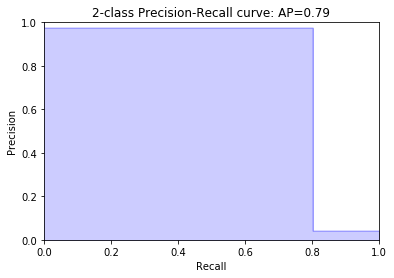

In [29]:
# Plot the recall precision tradeoff
plot_pr_curve(recall, precision, average_precision)

### 3.1.1 - Hyperparameter tuning

In [30]:
# Define the parameter sets to test
param_grid = {'n_estimators': [1, 30],
              'max_features': ['auto', 'log2'], 
              'max_depth': [4, 8, 10, 12],
              'criterion': ['gini', 'entropy']}

# Define the model to use
model = RandomForestClassifier(random_state=5)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)
CV_model.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 30}

In [31]:
# Get Model Results function
def get_model_results(X_train: np.ndarray, y_train: np.ndarray,
                      X_test: np.ndarray, y_test: np.ndarray, model):
    """
    model: sklearn model (e.g. RandomForestClassifier)
    """
    # Fit your training model to your training set
    model.fit(X_train, y_train)

    # Obtain the predicted values and probabilities from the model 
    predicted = model.predict(X_test)
    
    try:
        probs = model.predict_proba(X_test)
        print('ROC Score:')
        print(roc_auc_score(y_test, probs[:,1]))
    except AttributeError:
        pass

    # Print the ROC curve, classification report and confusion matrix
    print('\nClassification Report:')
    print(classification_report(y_test, predicted))
    print('\nConfusion Matrix:')
    print(confusion_matrix(y_test, predicted))
    model_cm = confusion_matrix(y_test, predicted)
    plot_confusion_matrix(model_cm)

In [32]:
def plot_confusion_matrix(cm, classes=['Not Fraud', 'Fraud'],
                          normalize=False,
                          title='Fraud Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    From:
        http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-
        examples-model-selection-plot-confusion-matrix-py
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

ROC Score:
0.9749697658225529

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.95      0.84      0.89        91

    accuracy                           0.99      2190
   macro avg       0.97      0.92      0.94      2190
weighted avg       0.99      0.99      0.99      2190


Confusion Matrix:
[[2095    4]
 [  15   76]]
Confusion matrix, without normalization


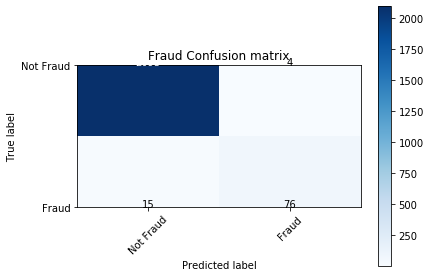

In [33]:
# Input the optimal parameters in the model
model = RandomForestClassifier(class_weight={0:1,1:12},
                               criterion='gini',
                               max_depth=8,
                               max_features='log2', 
                               min_samples_leaf=10,
                               n_estimators=30,
                               n_jobs=-1,
                               random_state=5)

# Get results from your model
get_model_results(X_train, y_train, X_test, y_test, model)

### 3.1.2 Ensemble Methods 

ROC Score:
0.9722054981702433

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2099
           1       0.63      0.88      0.73        91

    accuracy                           0.97      2190
   macro avg       0.81      0.93      0.86      2190
weighted avg       0.98      0.97      0.98      2190


Confusion Matrix:
[[2052   47]
 [  11   80]]
Confusion matrix, without normalization


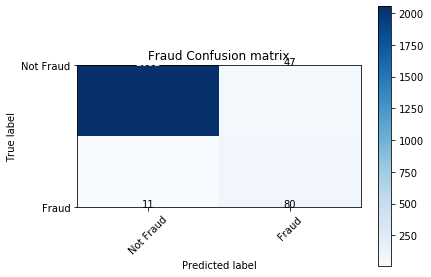

In [34]:
# Logistics Regression
# Logistic Regression model with weights
model = LogisticRegression(class_weight={0:1, 1:15}, random_state=5, solver='liblinear')

# Get the model results
get_model_results(X_train, y_train, X_test, y_test, model)


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2099
           1       0.90      0.86      0.88        91

    accuracy                           0.99      2190
   macro avg       0.95      0.93      0.94      2190
weighted avg       0.99      0.99      0.99      2190


Confusion Matrix:
[[2090    9]
 [  13   78]]
Confusion matrix, without normalization


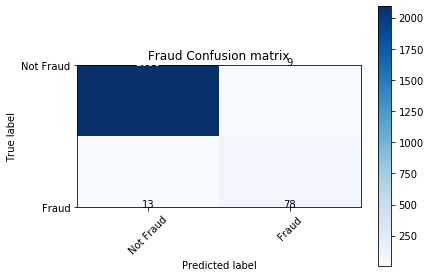

In [35]:
#Voting Classifier - Three ML models will be fitted into one.
# Define the three classifiers to use in the ensemble
clf1 = LogisticRegression(class_weight={0:1, 1:15},
                          random_state=5,
                          solver='liblinear')

clf2 = RandomForestClassifier(class_weight={0:1, 1:12}, 
                              criterion='gini', 
                              max_depth=8, 
                              max_features='log2',
                              min_samples_leaf=10, 
                              n_estimators=30, 
                              n_jobs=-1,
                              random_state=5)

clf3 = DecisionTreeClassifier(random_state=5,
                              class_weight="balanced")

# Combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard', flatten_transform=True)

# Get the results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

ROC Score:
0.9739279300975348

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.94      0.85      0.89        91

    accuracy                           0.99      2190
   macro avg       0.97      0.92      0.94      2190
weighted avg       0.99      0.99      0.99      2190


Confusion Matrix:
[[2094    5]
 [  14   77]]
Confusion matrix, without normalization


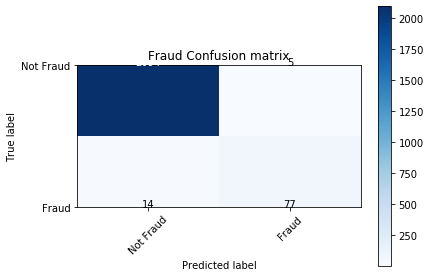

In [36]:
# Adjusting weights within the Voting Classifier
# Define the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft', weights=[1, 4, 1], flatten_transform=True)

# Get results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

# 4 - Technique 2 - Fraud Detection with Unsupervised Learning

In [37]:
# Load the data
banksim_df = pd.read_csv(r'C:\Users\smele\Documents\XTOL Big Data\Module 5\Task 4 - Capstone Project\banksim.csv')
banksim_df.drop(['Unnamed: 0'], axis=1, inplace=True)
banksim_adj_df = pd.read_csv(r'C:\Users\smele\Documents\XTOL Big Data\Module 5\Task 4 - Capstone Project\banksim_adj.csv')
banksim_adj_df.drop(['Unnamed: 0'], axis=1, inplace=True)

### 4.1 - Exploratory Data Analysis

In [38]:
banksim_df.shape

(7200, 5)

In [39]:
banksim_df.head()

,age,gender,category,amount,fraud
0,3,F,es_transportation,49.71,0
1,4,F,es_health,39.29,0
2,3,F,es_transportation,18.76,0
3,4,M,es_transportation,13.95,0
4,2,M,es_transportation,49.87,0


In [40]:
banksim_adj_df.shape

(7189, 18)

In [41]:
banksim_adj_df.head()

,age,amount,fraud,M,es_barsandrestaurants,es_contents,es_fashion,es_food,es_health,es_home,es_hotelservices,es_hyper,es_leisure,es_otherservices,es_sportsandtoys,es_tech,es_transportation,es_travel
0,3,49.71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,4,39.29,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,18.76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4,13.95,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,49.87,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [42]:
# Group the data by transaction category and take the mean of the data.
banksim_df.groupby(['category']).mean()

,amount,fraud
category,,
es_barsandrestaurants,43.841793,0.022472
es_contents,55.170000,0.000000
es_fashion,59.780769,0.020619
es_food,35.216050,0.000000
es_health,126.604704,0.242798
es_home,120.688317,0.208333
es_hotelservices,172.756245,0.548387
es_hyper,46.788180,0.125000
es_leisure,229.757600,1.000000


In [43]:
# Customer Segmentation
banksim_df.groupby(['age']).mean()

,amount,fraud
age,,
0,49.468935,0.050000
1,35.622829,0.026648
2,37.228665,0.028718
3,37.279338,0.023283
4,36.197985,0.035966
5,37.547521,0.023990
6,36.700852,0.022293
U,39.117000,0.000000


In [44]:
banksim_df.age.value_counts()

2    2333
3    1718
4    1279
5     792
1     713
6     314
0      40
U      11
Name: age, dtype: int64

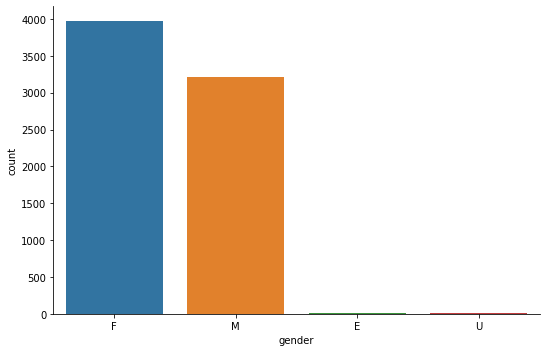

In [45]:
# Plot by gender
sns.factorplot('gender', data=banksim_df, kind='count', aspect=1.5)

In [46]:
# Create two dataframes with fraud and non-fraud data 
df_fraud = banksim_df[banksim_df.fraud == 1] 
df_non_fraud = banksim_df[banksim_df.fraud == 0]

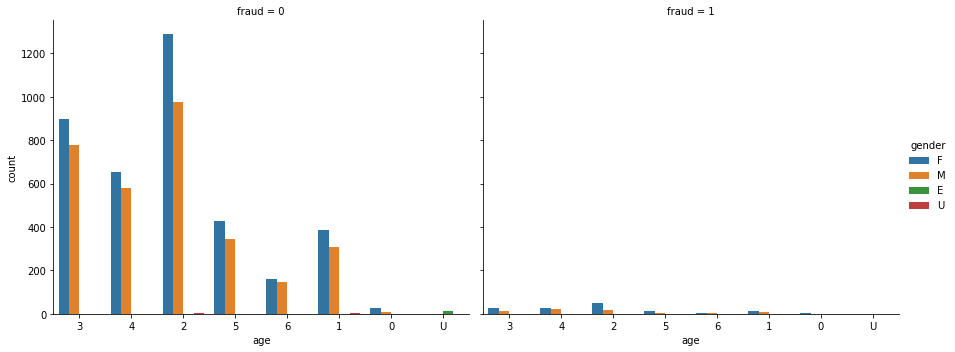

In [47]:
# Split the customers by fraud
sns.factorplot('age', data=banksim_df, kind='count', hue='gender', col='fraud',aspect=1.25, size=5)

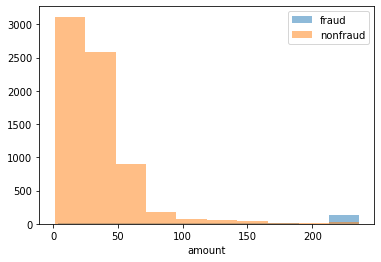

In [48]:
# Using statistics to define normal behavior
# Plot histograms of the amounts in fraud and non-fraud data 
plt.hist(df_fraud.amount, alpha=0.5, label='fraud')
plt.hist(df_non_fraud.amount, alpha=0.5, label='nonfraud')
plt.xlabel('amount')
plt.legend()
plt.show()

### 4.2 Clustering methods to detect fraud

In [49]:
# Scaling the data
labels = banksim_adj_df.fraud

In [50]:
cols = ['age', 'amount', 'M', 'es_barsandrestaurants', 'es_contents',
        'es_fashion', 'es_food', 'es_health', 'es_home', 'es_hotelservices',
        'es_hyper', 'es_leisure', 'es_otherservices', 'es_sportsandtoys',
        'es_tech', 'es_transportation', 'es_travel']

In [51]:
# Take the float values of df for X
X = banksim_adj_df[cols].values.astype(np.float)

In [52]:
X.shape

(7189, 17)

In [53]:
# Define the scaler and apply to the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [54]:
# Define the range of clusters to try
clustno = range(1, 10)

# Run MiniBatch Kmeans over the number of clusters
kmeans = [MiniBatchKMeans(n_clusters=i) for i in clustno]

# Obtain the score for each model
score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]

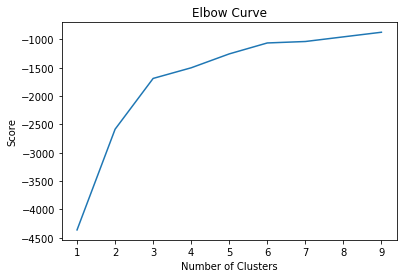

In [55]:
# Plot the models and their respective score 
plt.plot(clustno, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

### 3.2.2 - Detecting Fraud
### Assigning fraud vs. non-fraud

In [56]:
# Detecting outliers
# K-means algorithm is used to predict fraud, and compare those predictions to the actual labels that are saved
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels, test_size=0.3, random_state=0)

# Define K-means model 
kmeans = MiniBatchKMeans(n_clusters=3, random_state=42).fit(X_train)

# Obtain predictions and calculate distance from cluster centroid
X_test_clusters = kmeans.predict(X_test)
X_test_clusters_centers = kmeans.cluster_centers_
dist = [np.linalg.norm(x-y) for x, y in zip(X_test, X_test_clusters_centers[X_test_clusters])]

# Create fraud predictions based on outliers on clusters 
km_y_pred = np.array(dist)
km_y_pred[dist >= np.percentile(dist, 95)] = 1
km_y_pred[dist < np.percentile(dist, 95)] = 0

In [57]:
# Obtain the ROC score
auc = roc_auc_score(y_test, km_y_pred)
print("ROC", auc)

ROC 0.8109115999408585


In [58]:
# Create a confusion matrix
km_cm = confusion_matrix(y_test, km_y_pred)
print(km_cm)

[[2029   70]
 [  20   38]]


Confusion matrix, without normalization


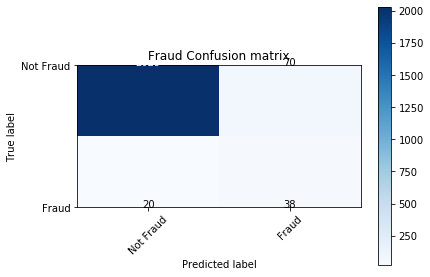

In [59]:
# Plot the confusion matrix in a figure to visualize results 
plot_confusion_matrix(km_cm)

### 3.2.3 Alternate clustering methods for fraud detection

### DB scan
The advantage of DBSCAN is that you do not need to define the number of clusters beforehand. Also, DBSCAN can handle weirdly shaped data (i.e. non-convex) much better than K-means can.

In [60]:
# Initialize and fit the DBscan model
db = DBSCAN(eps=0.95, min_samples=10, n_jobs=-1).fit(X_scaled)

# Obtain the predicted labels and calculate number of clusters
pred_labels = db.labels_
n_clusters = len(set(pred_labels)) - (1 if -1 in labels else 0)
n_noise = list(pred_labels).count(-1)

In [61]:
# Print performance metrics for DBscan
print(f'Estimated number of clusters: {n_clusters}')
print('Estimated number of noise points: %d' % n_noise)
print(f'Homogeneity: {homogeneity_score(labels, pred_labels):0.3f}')
print(f'Silhouette Coefficient: {silhouette_score(X_scaled, pred_labels):0.3f}')

Estimated number of clusters: 23
Estimated number of noise points: 53
Homogeneity: 0.612
Silhouette Coefficient: 0.713


Assessing smallest clusters

In [62]:
# Count observations in each cluster number
counts = np.bincount(pred_labels[pred_labels >= 0])

# Print the result
print(counts)

[3252  145 2714   55  174  119  122   98   54   15   76   15   43   25
   51   47   42   15   25   20   19   10]


In [63]:
# Sort the sample counts of the clusters and take the top 3 smallest clusters
smallest_clusters = np.argsort(counts)[:3]

In [64]:
# Print the results 
print(f'The smallest clusters are clusters: {smallest_clusters}')

The smallest clusters are clusters: [21 17  9]


In [65]:
# Print the counts of the smallest clusters only
print(f'Their counts are: {counts[smallest_clusters]}')

Their counts are: [10 15 15]


Results verification

In [66]:
# Create a dataframe of the predicted cluster numbers and fraud labels 
df = pd.DataFrame({'clusternr':pred_labels,'fraud':labels})

# Create a condition flagging fraud for the smallest clusters 
df['predicted_fraud'] = np.where((df['clusternr'].isin([21, 17, 9])), 1 , 0)

In [67]:
# Run a crosstab on the results 
print(pd.crosstab(df['fraud'], df['predicted_fraud'], rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

Flagged Fraud     0   1
Actual Fraud           
0              6973  16
1               176  24


# 4 - Results Discusion

# 5 - Recommendations

# 6 - References